In [1]:
import os
import glob
import yaml
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [121]:
# month = 5
# day = 29
# search_path = f'/a2/uaren/travis/results_opt/2014/{month:02}/{day:02}/owp_*'
search_path = f'/a2/uaren/travis/results_opt/2014/*/*/owp_*'
opt_paths = glob.glob(search_path)
year = 2014

params = np.ones([len(opt_paths), 5])*np.nan
date_index = pd.Series(index=np.arange(len(opt_paths)))

for count, opt_path in enumerate(opt_paths):
    ymlpaths = glob.glob(os.path.join(opt_path, 'config_*'))
    rmse_paths = glob.glob(os.path.join(opt_path, 'rmse.h5'))
    if len(ymlpaths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of configuration files: ', len(ymlpaths))
        continue
    else:
        ymlpath = ymlpaths[0]
    with open(ymlpath, 'r') as ymlfile:
        cfg = yaml.load(ymlfile)    
    date_index[count] = pd.datetime(year, cfg['date']['month'], cfg['date']['day'])
    params[count, 0] = cfg['wrf']['loc']
    params[count, 1] = cfg['wrf']['infl']
    params[count, 2] = cfg['opt_flow']['loc']
    params[count, 3] = cfg['opt_flow']['infl']
    
    if len(rmse_paths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of rmse files: ', len(rmse_paths))
        continue
    else:
        rmse_path = rmse_paths[0]
    rmse_df = pd.read_hdf(rmse_path)
    params[count, 4] = np.nanmean(rmse_df[[15, 30, 45, 60]].values)

owp_004_1p5_010_2p0_050_0p25
Number of rmse files:  0


In [122]:
dates, counts = np.unique(list(zip(params[:, 0], params[:, 1])), axis=0, return_counts=True)
max_size = counts.max()

In [123]:
iterables = (
    [date_index.unique()] + [np.unique(p) for p in params[:, :-1].T])

In [124]:
M_index = pd.MultiIndex.from_product(iterables, names=['date', 'wrf_l', 'wrf_i', 'of_l', 'of_i'])
data_frame = pd.DataFrame(index=M_index, columns=['RMSE'])

In [125]:
for num in range(params.shape[0]):
    data_frame['RMSE'].loc[
        date_index[num],
        params[num, 0],
        params[num, 1],
        params[num, 2],
        params[num, 3]] = params[num, 4]

In [126]:
date = '2014-05-29'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [127]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [128]:
print(reshaped)

                 RMSE                                                  
of_l             4.0                 10.0                20.0          
of_i              1.5       2.0       1.5       2.0       1.5       2.0
wrf_l wrf_i                                                            
2.0   1.5    0.164471  0.165129  0.160564  0.162455  0.157606  0.157408
      4.0    0.166168  0.165092  0.162326  0.161425  0.158059  0.157839
4.0   1.5    0.166583  0.167848  0.164631  0.165096  0.161822  0.162043
      4.0    0.167946  0.168441  0.164144  0.166007  0.161563  0.162694
10.0  1.5    0.165426  0.167617  0.166132  0.165697  0.163411  0.162574
      4.0    0.167163  0.169201  0.166575  0.165874  0.164973   0.16526


In [129]:
%matplotlib inline

Text(0.5,1,'2014-05-29')

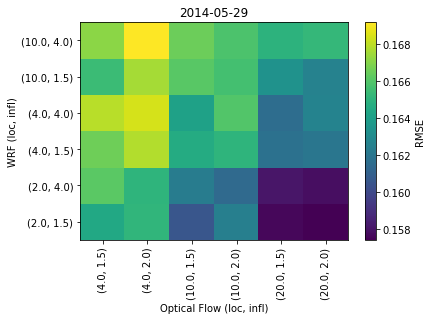

In [130]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure()
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)

In [131]:
print(date,'\n', data_frame.loc[(date, slice(None), slice(None), slice(None), slice(None))].idxmin().item())

2014-05-29 
 (2.0, 1.5, 20.0, 2.0)


In [132]:
date = '2014-04-15'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [133]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [134]:
print(reshaped)

                  RMSE                                                       
of_l              4.0                   10.0                  20.0           
of_i               1.5        2.0        1.5        2.0        1.5        2.0
wrf_l wrf_i                                                                  
2.0   1.5     0.042045  0.0404237  0.0382439    0.04125  0.0398763  0.0398031
      4.0    0.0458206  0.0438817   0.040933  0.0391412  0.0404688  0.0370414
4.0   1.5     0.045915  0.0438494  0.0411818        NaN        NaN        NaN
      4.0          NaN        NaN        NaN        NaN        NaN        NaN
10.0  1.5          NaN        NaN        NaN        NaN        NaN        NaN
      4.0          NaN        NaN        NaN        NaN        NaN        NaN


In [135]:
%matplotlib inline

Text(0.5,1,'2014-04-15')

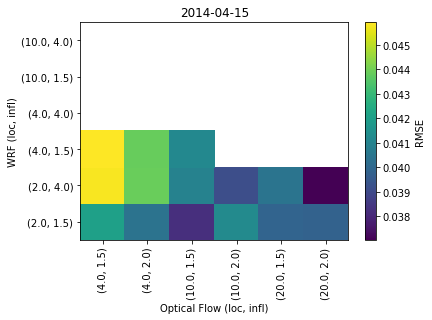

In [136]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure()
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)

In [71]:
print(date,'\n', data_frame.loc[(date, slice(None), slice(None), slice(None), slice(None))].idxmin().item())

2014-04-15 
 (2.0, 1.5, 10.0, 1.5)


In [50]:
# month = 5
# day = 29
# search_path = f'/a2/uaren/travis/results_opt/2014/{month:02}/{day:02}/owp_*'
search_path = f'/a2/uaren/travis/results_opt/2014/*/*/ow_*'
opt_paths = glob.glob(search_path)
year = 2014

params = np.ones([len(opt_paths), 5])*np.nan
date_index = pd.Series(index=np.arange(len(opt_paths)))

for count, opt_path in enumerate(opt_paths):
    ymlpaths = glob.glob(os.path.join(opt_path, 'config_*'))
    rmse_paths = glob.glob(os.path.join(opt_path, 'rmse.h5'))
    if len(ymlpaths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of configuration files: ', len(ymlpaths))
        continue
    else:
        ymlpath = ymlpaths[0]
    with open(ymlpath, 'r') as ymlfile:
        cfg = yaml.load(ymlfile)    
    date_index[count] = pd.datetime(year, cfg['date']['month'], cfg['date']['day'])
    params[count, 0] = cfg['wrf']['loc']
    params[count, 1] = cfg['wrf']['infl']
    params[count, 2] = cfg['opt_flow']['loc']
    params[count, 3] = cfg['opt_flow']['infl']
    
    if len(rmse_paths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of rmse files: ', len(rmse_paths))
        continue
    else:
        rmse_path = rmse_paths[0]
    rmse_df = pd.read_hdf(rmse_path)
    params[count, 4] = np.nanmean(rmse_df[[15, 30, 45, 60]].values)

In [51]:
dates, counts = np.unique(list(zip(params[:, 0], params[:, 1])), axis=0, return_counts=True)
max_size = counts.max()

In [52]:
iterables = (
    [date_index.unique()] + [np.unique(p) for p in params[:, :-1].T])

In [53]:
M_index = pd.MultiIndex.from_product(iterables, names=['date', 'wrf_l', 'wrf_i', 'of_l', 'of_i'])
data_frame = pd.DataFrame(index=M_index, columns=['RMSE'])

In [54]:
for num in range(params.shape[0]):
    data_frame['RMSE'].loc[
        date_index[num],
        params[num, 0],
        params[num, 1],
        params[num, 2],
        params[num, 3]] = params[num, 4]

In [55]:
date = '2014-05-29'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [56]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [57]:
print(reshaped)

                 RMSE                              
of_l             4.0                 20.0          
of_i              1.5       2.0       1.5       2.0
wrf_l wrf_i                                        
4.0   1.5    0.179225  0.179909  0.174149  0.176678
      4.0    0.175384  0.175807  0.171094    0.1712
10.0  1.5    0.180777  0.180783  0.180545  0.180297
      4.0    0.178222  0.178315  0.176442   0.17634


In [58]:
%matplotlib inline

Text(0.5,1,'2014-05-29')

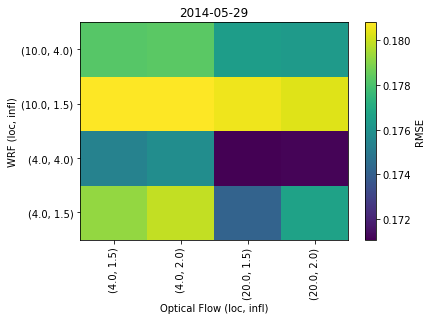

In [59]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure()
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)

In [43]:
print(date,'\n', data_frame.loc[(date, slice(None), slice(None), slice(None), slice(None))].idxmin().item())

2014-05-29 
 (2.0, 1.5, 20.0, 2.0)
